## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
#gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.7)
#sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])

    return model
model = build_mlp()

In [11]:
"""
Compile 模型
"""
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 512)               1573376   
_________________________________________________________________
dense_14 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_15 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_16 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [12]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=300, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 4s 79us/step - loss: 1.9190 - acc: 0.3086 - val_loss: 1.7680 - val_acc: 0.3730
Epoch 2/300
50000/50000 [==============================] - 3s 61us/step - loss: 1.7133 - acc: 0.3850 - val_loss: 1.6994 - val_acc: 0.3877
Epoch 3/300
50000/50000 [==============================] - 3s 62us/step - loss: 1.6172 - acc: 0.4252 - val_loss: 1.6082 - val_acc: 0.4206
Epoch 4/300
50000/50000 [==============================] - 3s 67us/step - loss: 1.5567 - acc: 0.4443 - val_loss: 1.5103 - val_acc: 0.4627
Epoch 5/300
50000/50000 [==============================] - 3s 66us/step - loss: 1.5066 - acc: 0.4659 - val_loss: 1.5541 - val_acc: 0.4435
Epoch 6/300
50000/50000 [==============================] - 3s 62us/step - loss: 1.4718 - acc: 0.4740 - val_loss: 1.4676 - val_acc: 0.4803
Epoch 7/300
50000/50000 [==============================] - 3s 61us/step - loss: 1.4373 - acc: 0.4866 - val_loss: 1.4962 - 

50000/50000 [==============================] - 3s 59us/step - loss: 0.5609 - acc: 0.8000 - val_loss: 1.9432 - val_acc: 0.5125
Epoch 60/300
50000/50000 [==============================] - 3s 61us/step - loss: 0.5665 - acc: 0.7983 - val_loss: 1.9700 - val_acc: 0.5142
Epoch 61/300
50000/50000 [==============================] - 3s 62us/step - loss: 0.5428 - acc: 0.8061 - val_loss: 2.0438 - val_acc: 0.5115
Epoch 62/300
50000/50000 [==============================] - 3s 62us/step - loss: 0.5380 - acc: 0.8071 - val_loss: 2.0170 - val_acc: 0.5124
Epoch 63/300
50000/50000 [==============================] - 3s 62us/step - loss: 0.5252 - acc: 0.8124 - val_loss: 2.0731 - val_acc: 0.5119
Epoch 64/300
50000/50000 [==============================] - 3s 60us/step - loss: 0.5117 - acc: 0.8185 - val_loss: 2.1188 - val_acc: 0.5120
Epoch 65/300
50000/50000 [==============================] - 3s 62us/step - loss: 0.5209 - acc: 0.8141 - val_loss: 2.1070 - val_acc: 0.5148
Epoch 66/300
50000/50000 [==============

Epoch 118/300
50000/50000 [==============================] - 3s 59us/step - loss: 0.2751 - acc: 0.9016 - val_loss: 3.3020 - val_acc: 0.4983
Epoch 119/300
50000/50000 [==============================] - 3s 58us/step - loss: 0.2342 - acc: 0.9165 - val_loss: 3.3099 - val_acc: 0.5045
Epoch 120/300
50000/50000 [==============================] - 3s 59us/step - loss: 0.2398 - acc: 0.9138 - val_loss: 3.3288 - val_acc: 0.5047
Epoch 121/300
50000/50000 [==============================] - 3s 59us/step - loss: 0.2794 - acc: 0.8999 - val_loss: 3.3659 - val_acc: 0.4984
Epoch 122/300
50000/50000 [==============================] - 3s 58us/step - loss: 0.2340 - acc: 0.9167 - val_loss: 3.3426 - val_acc: 0.4977
Epoch 123/300
50000/50000 [==============================] - 3s 62us/step - loss: 0.2867 - acc: 0.8973 - val_loss: 3.4005 - val_acc: 0.4977
Epoch 124/300
50000/50000 [==============================] - 3s 64us/step - loss: 0.2437 - acc: 0.9131 - val_loss: 3.3747 - val_acc: 0.5024
Epoch 125/300
50000/

50000/50000 [==============================] - 3s 59us/step - loss: 0.1740 - acc: 0.9387 - val_loss: 4.1360 - val_acc: 0.4918
Epoch 177/300
50000/50000 [==============================] - 3s 58us/step - loss: 0.1892 - acc: 0.9339 - val_loss: 4.1068 - val_acc: 0.4914
Epoch 178/300
50000/50000 [==============================] - 3s 59us/step - loss: 0.2104 - acc: 0.9268 - val_loss: 4.1599 - val_acc: 0.4849
Epoch 179/300
50000/50000 [==============================] - 3s 63us/step - loss: 0.1912 - acc: 0.9331 - val_loss: 3.9699 - val_acc: 0.4935
Epoch 180/300
50000/50000 [==============================] - 3s 60us/step - loss: 0.1264 - acc: 0.9553 - val_loss: 4.1411 - val_acc: 0.5052
Epoch 181/300
50000/50000 [==============================] - 3s 60us/step - loss: 0.1327 - acc: 0.9531 - val_loss: 4.1812 - val_acc: 0.4980
Epoch 182/300
50000/50000 [==============================] - 3s 60us/step - loss: 0.2094 - acc: 0.9277 - val_loss: 4.1541 - val_acc: 0.4825
Epoch 183/300
50000/50000 [=======

50000/50000 [==============================] - 3s 69us/step - loss: 0.1330 - acc: 0.9534 - val_loss: 4.4757 - val_acc: 0.4994
Epoch 235/300
50000/50000 [==============================] - 4s 72us/step - loss: 0.0969 - acc: 0.9657 - val_loss: 4.6040 - val_acc: 0.5002
Epoch 236/300
50000/50000 [==============================] - 3s 69us/step - loss: 0.1328 - acc: 0.9533 - val_loss: 4.5442 - val_acc: 0.4988
Epoch 237/300
50000/50000 [==============================] - 3s 69us/step - loss: 0.1471 - acc: 0.9485 - val_loss: 4.4889 - val_acc: 0.4900
Epoch 238/300
50000/50000 [==============================] - 4s 72us/step - loss: 0.1638 - acc: 0.9441 - val_loss: 4.4976 - val_acc: 0.4988
Epoch 239/300
50000/50000 [==============================] - 3s 65us/step - loss: 0.0806 - acc: 0.9723 - val_loss: 4.5101 - val_acc: 0.4942
Epoch 240/300
50000/50000 [==============================] - 3s 65us/step - loss: 0.1189 - acc: 0.9592 - val_loss: 4.5532 - val_acc: 0.4967
Epoch 241/300
50000/50000 [=======

50000/50000 [==============================] - 3s 68us/step - loss: 0.1454 - acc: 0.9522 - val_loss: 4.9277 - val_acc: 0.4882
Epoch 293/300
50000/50000 [==============================] - 3s 66us/step - loss: 0.1215 - acc: 0.9592 - val_loss: 4.7685 - val_acc: 0.4955
Epoch 294/300
50000/50000 [==============================] - 3s 65us/step - loss: 0.1076 - acc: 0.9643 - val_loss: 4.8343 - val_acc: 0.4944
Epoch 295/300
50000/50000 [==============================] - 3s 64us/step - loss: 0.0846 - acc: 0.9717 - val_loss: 4.7977 - val_acc: 0.4977
Epoch 296/300
50000/50000 [==============================] - 3s 66us/step - loss: 0.1095 - acc: 0.9625 - val_loss: 4.7685 - val_acc: 0.4958
Epoch 297/300
50000/50000 [==============================] - 4s 74us/step - loss: 0.1564 - acc: 0.9471 - val_loss: 5.0138 - val_acc: 0.4860
Epoch 298/300
50000/50000 [==============================] - 3s 70us/step - loss: 0.1402 - acc: 0.9529 - val_loss: 4.8698 - val_acc: 0.4984.
Epoch 299/300
50000/50000 [======

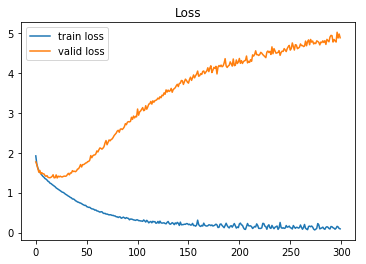

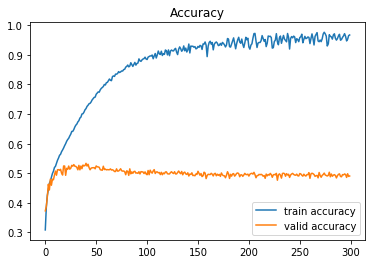

In [13]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [8]:
model = build_mlp()
# 用 Keras 內建方法檢視模型各層參數量
model.summary()

optimizer = keras.optimizers.SGD(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_9 (Dense)              (None, 512)               1573376   
_________________________________________________________________
dense_10 (Dense)             (None, 256)               131328    
_________________________________________________________________
dense_11 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_12 (Dense)             (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________


In [9]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=300, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/300
50000/50000 [==============================] - 3s 63us/step - loss: 2.2613 - acc: 0.1503 - val_loss: 2.2138 - val_acc: 0.1958
Epoch 2/300
50000/50000 [==============================] - 3s 54us/step - loss: 2.1803 - acc: 0.2141 - val_loss: 2.1508 - val_acc: 0.2264
Epoch 3/300
50000/50000 [==============================] - 3s 53us/step - loss: 2.1254 - acc: 0.2419 - val_loss: 2.1033 - val_acc: 0.2506
Epoch 4/300
50000/50000 [==============================] - 3s 57us/step - loss: 2.0819 - acc: 0.2608 - val_loss: 2.0650 - val_acc: 0.2613
Epoch 5/300
50000/50000 [==============================] - 3s 57us/step - loss: 2.0472 - acc: 0.2763 - val_loss: 2.0342 - val_acc: 0.2843
Epoch 6/300
50000/50000 [==============================] - 3s 53us/step - loss: 2.0183 - acc: 0.2894 - val_loss: 2.0074 - val_acc: 0.2958
Epoch 7/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.9933 - acc: 0.2991 - val_loss: 1.9843 - 

50000/50000 [==============================] - 3s 54us/step - loss: 1.6511 - acc: 0.4242 - val_loss: 1.6572 - val_acc: 0.4185
Epoch 60/300
50000/50000 [==============================] - 3s 53us/step - loss: 1.6481 - acc: 0.4252 - val_loss: 1.6541 - val_acc: 0.4206
Epoch 61/300
50000/50000 [==============================] - 3s 53us/step - loss: 1.6456 - acc: 0.4265 - val_loss: 1.6523 - val_acc: 0.4218
Epoch 62/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.6428 - acc: 0.4260 - val_loss: 1.6527 - val_acc: 0.4243
Epoch 63/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.6400 - acc: 0.4279 - val_loss: 1.6493 - val_acc: 0.4193
Epoch 64/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.6371 - acc: 0.4285 - val_loss: 1.6439 - val_acc: 0.4248
Epoch 65/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.6344 - acc: 0.4295 - val_loss: 1.6421 - val_acc: 0.4257
Epoch 66/300
50000/50000 [==============

Epoch 118/300
50000/50000 [==============================] - 3s 56us/step - loss: 1.5175 - acc: 0.4697 - val_loss: 1.5417 - val_acc: 0.4540
Epoch 119/300
50000/50000 [==============================] - 3s 55us/step - loss: 1.5159 - acc: 0.4704 - val_loss: 1.5517 - val_acc: 0.4509
Epoch 120/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.5140 - acc: 0.4711 - val_loss: 1.5382 - val_acc: 0.4579
Epoch 121/300
50000/50000 [==============================] - 3s 56us/step - loss: 1.5125 - acc: 0.4711 - val_loss: 1.5392 - val_acc: 0.4550
Epoch 122/300
50000/50000 [==============================] - 3s 55us/step - loss: 1.5110 - acc: 0.4713 - val_loss: 1.5371 - val_acc: 0.4595
Epoch 123/300
50000/50000 [==============================] - 3s 56us/step - loss: 1.5091 - acc: 0.4722 - val_loss: 1.5359 - val_acc: 0.4576
Epoch 124/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.5070 - acc: 0.4733 - val_loss: 1.5343 - val_acc: 0.4562
Epoch 125/300
50000/

50000/50000 [==============================] - 3s 64us/step - loss: 1.4235 - acc: 0.5036 - val_loss: 1.4873 - val_acc: 0.4764
Epoch 177/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.4218 - acc: 0.5037 - val_loss: 1.4847 - val_acc: 0.4758
Epoch 178/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.4203 - acc: 0.5039 - val_loss: 1.4726 - val_acc: 0.4810
Epoch 179/300
50000/50000 [==============================] - 3s 54us/step - loss: 1.4188 - acc: 0.5045 - val_loss: 1.4679 - val_acc: 0.4799
Epoch 180/300
50000/50000 [==============================] - 3s 53us/step - loss: 1.4173 - acc: 0.5050 - val_loss: 1.4698 - val_acc: 0.4817
Epoch 181/300
50000/50000 [==============================] - 3s 55us/step - loss: 1.4157 - acc: 0.5065 - val_loss: 1.4665 - val_acc: 0.4846
Epoch 182/300
50000/50000 [==============================] - 3s 53us/step - loss: 1.4143 - acc: 0.5060 - val_loss: 1.4675 - val_acc: 0.4790
Epoch 183/300
50000/50000 [=======

50000/50000 [==============================] - 3s 54us/step - loss: 1.3403 - acc: 0.5308 - val_loss: 1.4227 - val_acc: 0.4974
Epoch 235/300
50000/50000 [==============================] - 3s 53us/step - loss: 1.3383 - acc: 0.5325 - val_loss: 1.4291 - val_acc: 0.4925
Epoch 236/300
50000/50000 [==============================] - 3s 52us/step - loss: 1.3372 - acc: 0.5322 - val_loss: 1.4271 - val_acc: 0.4980
Epoch 237/300
50000/50000 [==============================] - 3s 52us/step - loss: 1.3356 - acc: 0.5332 - val_loss: 1.4267 - val_acc: 0.4956
Epoch 238/300
50000/50000 [==============================] - 3s 52us/step - loss: 1.3342 - acc: 0.5332 - val_loss: 1.4286 - val_acc: 0.4911
Epoch 239/300
50000/50000 [==============================] - 3s 52us/step - loss: 1.3328 - acc: 0.5354 - val_loss: 1.4271 - val_acc: 0.4954
Epoch 240/300
50000/50000 [==============================] - 3s 53us/step - loss: 1.3313 - acc: 0.5352 - val_loss: 1.4278 - val_acc: 0.4991
Epoch 241/300
50000/50000 [=======

50000/50000 [==============================] - 3s 53us/step - loss: 1.2651 - acc: 0.5590 - val_loss: 1.3936 - val_acc: 0.5113
Epoch 293/300
50000/50000 [==============================] - 3s 53us/step - loss: 1.2638 - acc: 0.5594 - val_loss: 1.3834 - val_acc: 0.5092
Epoch 294/300
50000/50000 [==============================] - 3s 53us/step - loss: 1.2629 - acc: 0.5583 - val_loss: 1.3933 - val_acc: 0.5110
Epoch 295/300
50000/50000 [==============================] - 3s 52us/step - loss: 1.2612 - acc: 0.5589 - val_loss: 1.3894 - val_acc: 0.5114
Epoch 296/300
50000/50000 [==============================] - 3s 53us/step - loss: 1.2598 - acc: 0.5602 - val_loss: 1.3844 - val_acc: 0.5102
Epoch 297/300
50000/50000 [==============================] - 3s 53us/step - loss: 1.2588 - acc: 0.5610 - val_loss: 1.3786 - val_acc: 0.5090
Epoch 298/300
50000/50000 [==============================] - 3s 53us/step - loss: 1.2576 - acc: 0.5598 - val_loss: 1.3790 - val_acc: 0.5113
Epoch 299/300
50000/50000 [=======

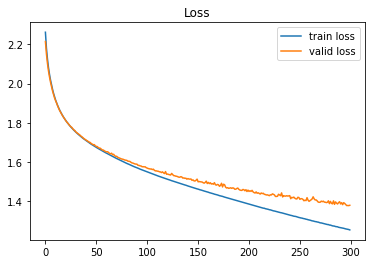

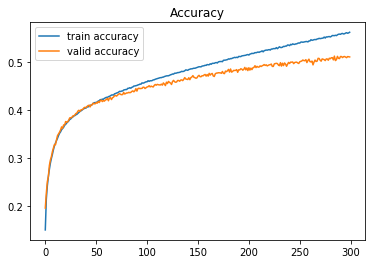

In [10]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()